In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
## Read the data
data = pd.read_csv('economic_data.csv')

In [97]:
data.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [98]:
## Remove unnecessary columns or features 
## year and month are not required
data.drop(columns=['year', 'month'], axis=1, inplace=True)

In [99]:
data.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [100]:
## Find a correlation between features
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


In [101]:
### In the above result if interest_rate increases then other two features are decreasing and vice versa
## therefore, these all feature correlated with each other

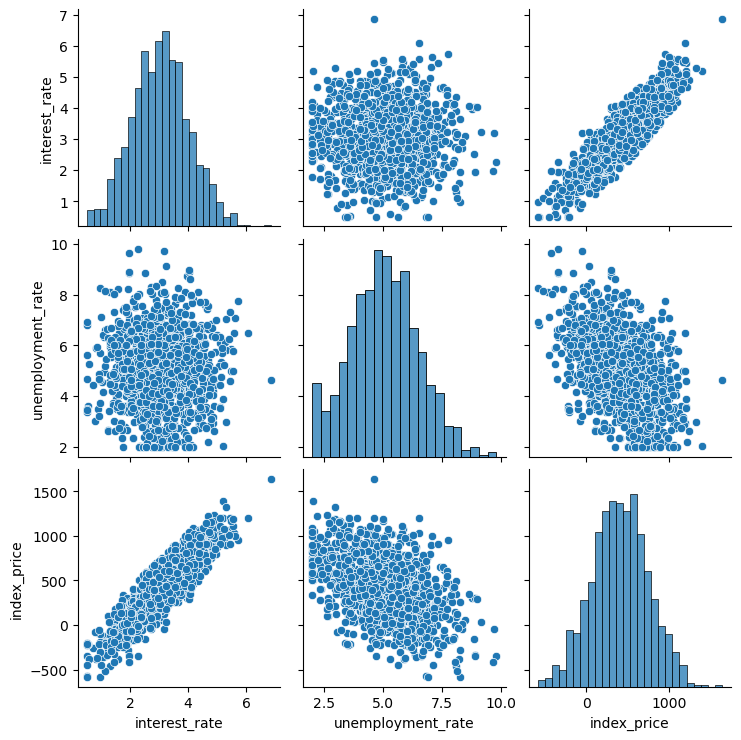

In [102]:
## Visualize in pair plot to see the relation
import seaborn as sns
sns.pairplot(data)

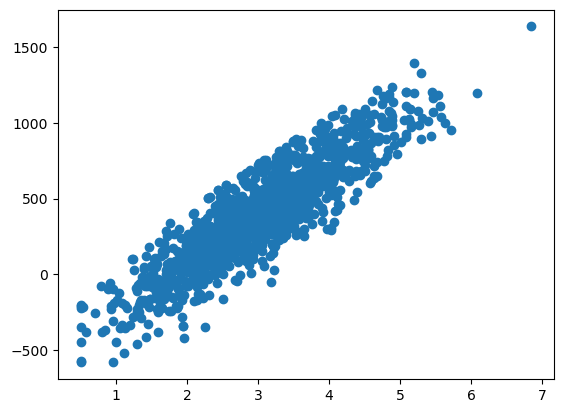

In [103]:
## Visualize in scatter plot

plt.scatter(x=data['interest_rate'], y=data['index_price'])

In [104]:
## Independent and dependent features
X = data[['interest_rate', 'unemployment_rate']]
y = data['index_price']

In [105]:
X.shape

(1200, 2)

In [106]:
y.shape

(1200,)

In [107]:
y

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

In [108]:
## Test Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
X_train.shape 

(900, 2)

In [110]:
## Regression plot (this will be useful only two features and not for multiple features)
import seaborn as sns

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

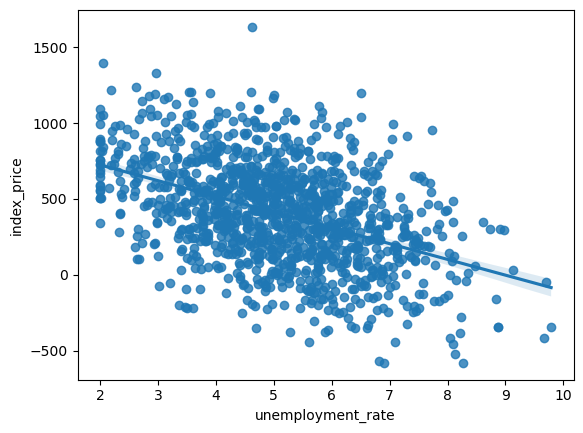

In [111]:
sns.regplot(x=data['unemployment_rate'], y=data['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

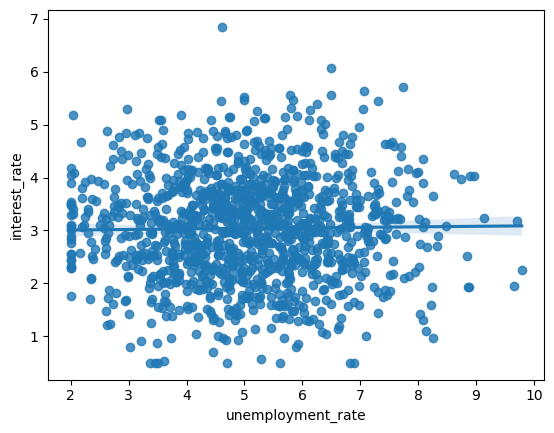

In [112]:
sns.regplot(x=data['unemployment_rate'], y=data['interest_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

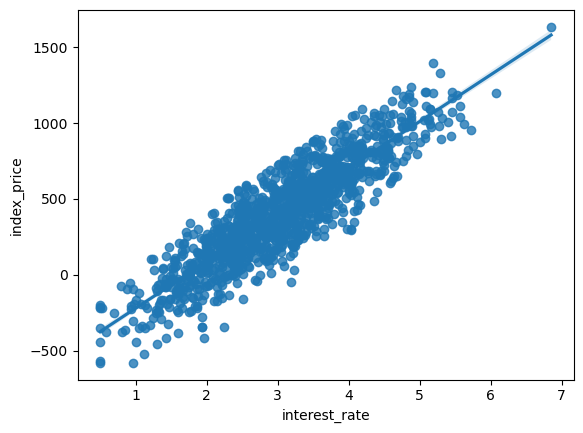

In [113]:
sns.regplot(x=data['interest_rate'], y=data['index_price'])

In [114]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [116]:
## Model training
from sklearn.linear_model import LinearRegression

In [117]:
regression = LinearRegression()

In [118]:
regression.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = regression.predict(X_test)

In [120]:
### Additional testing of model with cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

In [121]:
np.mean(validation_score)

-0.6794977536162428

In [122]:
## Performance matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [123]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

916.2519044815493
24.127172169046645
0.9922220008229768
30.269653193942432


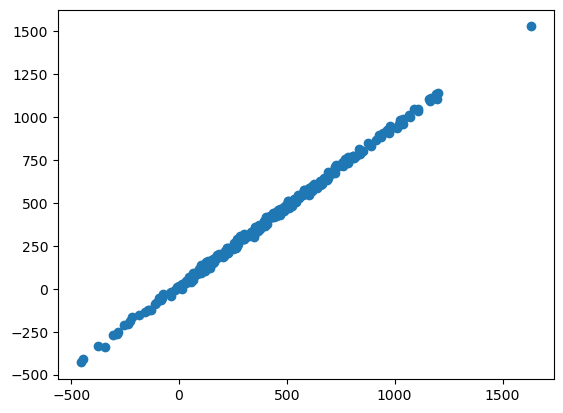

In [124]:
## Assumption 
# (If these two following some form of linear relationship then 
# model is performing well)

plt.scatter(y_test, y_pred)

In [125]:
## Residuals (Error)
residuals = y_pred - y_test
print(residuals)

1178    13.175548
865     -1.693288
101     -3.145250
439     -9.289620
58     -19.544068
          ...    
772    -29.027012
494    -50.666430
1027   -14.429856
806    -17.804515
1141   -47.482292
Name: index_price, Length: 300, dtype: float64


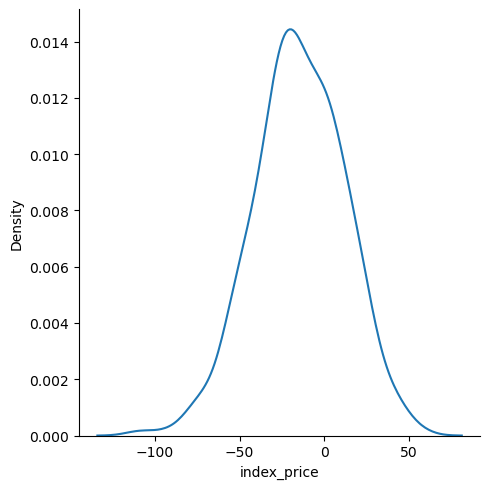

In [126]:
### Visualize in dist plot
sns.displot(residuals, kind='kde')

<Axes: ylabel='index_price'>

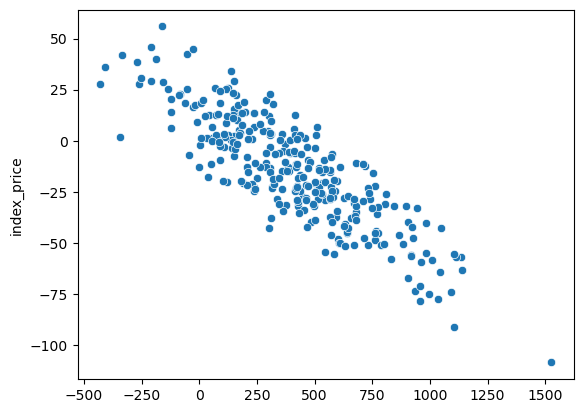

In [127]:
## Scatter plot with respect to residuals and prediction

sns.scatterplot(x=y_pred, y=residuals)

In [128]:
### OLS prdiction

import statsmodels.api as stat
model = stat.OLS(y_train, X_train).fit()

In [130]:
prediction = model.predict(X_test)
print(prediction)


[-231.12375435  -33.29076005 -295.8201699   139.28218889  192.270642
  229.37079999  734.55505386   -9.48799224  -83.05189661  -45.82599352
 -173.64028555 -333.04799452 -266.45131129 -191.55587447 -347.4158193
 -241.37892281   47.55440795 -229.22348667  267.67034023  368.13666234
 -287.40207631  267.29246442 -241.63297505  -52.85256441 -112.16862452
 -254.54544382  516.08533702  -17.6526741  -165.72389134 -314.43216068
  -98.94083224  501.52280976 -253.53435896  130.16769344  275.70607445
  -41.07692561  -25.87990827  -89.7567389    61.48180463   99.90516844
 -527.52216258   33.68892305 -278.53843055 -359.88785997  -56.20690709
 -215.41927306   15.07629177 -487.07086447   62.30138956  441.88758309
  188.03160008  165.11481254  -95.83541773  -92.29341818   18.93937941
  -44.68403949   -9.61373734  -13.15765842  277.48251856 -152.87333436
 -311.70910554  104.77805993  -67.59890551  542.2275196   -16.00773968
 -330.8304818  -261.44498859 -832.65847147 -348.17477345 -113.37120932
  200.124

In [131]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              315.8
Date:                Thu, 13 Feb 2025   Prob (F-statistic):                   1.43e-104
Time:                        08:20:39   Log-Likelihood:                         -6677.3
No. Observations:                 900   AIC:                                  1.336e+04
Df Residuals:                     898   BIC:                                  1.337e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
regression.coef_

array([ 297.94623606, -154.59112154])